<a href="https://colab.research.google.com/github/Guylord/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing yfinance library to fetch financial data
import yfinance as yf

# Define the stock ticker symbol and download the historical stock data from Yahoo Finance
ticker = "AAPL"
data = yf.download(ticker, start="2016-01-01", end="2024-11-15")

# Resetting the index to have Date as a column instead of an index
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Previewing the data
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-01-04 00:00:00+00:00,23.860580,26.337500,26.342501,25.500000,25.652500,270597600
1,2016-01-05 00:00:00+00:00,23.262651,25.677500,26.462500,25.602501,26.437500,223164000
2,2016-01-06 00:00:00+00:00,22.807415,25.174999,25.592501,24.967501,25.139999,273829600
3,2016-01-07 00:00:00+00:00,21.844839,24.112499,25.032499,24.107500,24.670000,324377600
4,2016-01-08 00:00:00+00:00,21.960346,24.240000,24.777500,24.190001,24.637501,283192000
...,...,...,...,...,...,...,...
2228,2024-11-08 00:00:00+00:00,226.960007,226.960007,228.660004,226.410004,227.169998,38328800
2229,2024-11-11 00:00:00+00:00,224.229996,224.229996,225.699997,221.500000,225.000000,42005600
2230,2024-11-12 00:00:00+00:00,224.229996,224.229996,225.589996,223.360001,224.550003,40398300


In [4]:
# Displaying the information of the DataFrame (structure, types, non-null counts, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   (Date, )           2233 non-null   datetime64[ns, UTC]
 1   (Adj Close, AAPL)  2233 non-null   float64            
 2   (Close, AAPL)      2233 non-null   float64            
 3   (High, AAPL)       2233 non-null   float64            
 4   (Low, AAPL)        2233 non-null   float64            
 5   (Open, AAPL)       2233 non-null   float64            
 6   (Volume, AAPL)     2233 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 122.2 KB


In [5]:
# Checking the column names
data.columns

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [6]:
# Renaming the columns to remove multi-level index (from 'Price' and 'Ticker') for easier access
data.columns = data.columns.map(lambda x: f"{x[0]}" if x[1] else x[0])
data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [7]:
# Reordering the columns
column_order = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data = data.reindex(columns=column_order)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04 00:00:00+00:00,25.652500,26.342501,25.500000,26.337500,23.860580,270597600
1,2016-01-05 00:00:00+00:00,26.437500,26.462500,25.602501,25.677500,23.262651,223164000
2,2016-01-06 00:00:00+00:00,25.139999,25.592501,24.967501,25.174999,22.807415,273829600
3,2016-01-07 00:00:00+00:00,24.670000,25.032499,24.107500,24.112499,21.844839,324377600
4,2016-01-08 00:00:00+00:00,24.637501,24.777500,24.190001,24.240000,21.960346,283192000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       2233 non-null   datetime64[ns, UTC]
 1   Open       2233 non-null   float64            
 2   High       2233 non-null   float64            
 3   Low        2233 non-null   float64            
 4   Close      2233 non-null   float64            
 5   Adj Close  2233 non-null   float64            
 6   Volume     2233 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 122.2 KB


In [9]:
# Extracting the 'Close' prices for use in the model
close_prices = data['Close'].values.reshape(-1, 1)

In [10]:
# Importing MinMaxScaler to normalize the data for the LSTM model
from sklearn.preprocessing import MinMaxScaler

# Scaling the close prices to the range 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [11]:
# Setting the sequence length (number of past days to look at for predicting the next day's price)
sequence_length = 60

# Preparing the input (X) and output (y) for model training
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

# Converting X and y into numpy arrays for use in training
X, y = np.array(X), np.array(y)

In [12]:
# Splitting the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [13]:
# Importing necessary layers for the LSTM model from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Building the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1) # Output layer with one neuron (predicting the closing price)
])

# Compiling the model with Adam optimizer and Mean Squared Error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Training the model with the training data, validating on the test data, and using 50 epochs
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0395 - val_loss: 0.0022
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 9.4058e-04
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - val_loss: 8.6098e-04
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.8061e-04 - val_loss: 7.7773e-04
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.2126e-04 - val_loss: 0.0027
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.0590e-04 - val_loss: 0.0012
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s

In [15]:
# Making predictions using the trained LSTM model on the test data (X_test)
predictions = model.predict(X_test)

# Inverse transforming the predictions back to the original scale of stock prices using the scaler
# This converts the normalized predicted values back to their actual price values
predictions = scaler.inverse_transform(predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


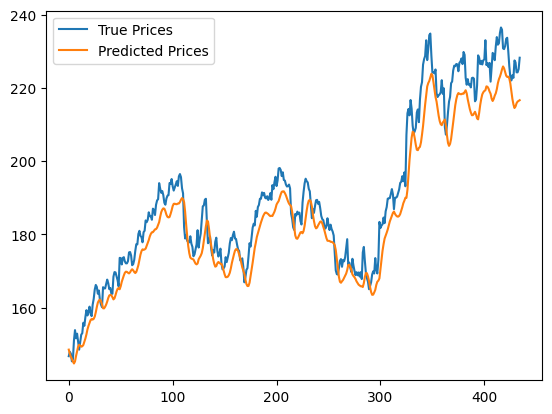

In [16]:
# Plotting the true vs predicted stock prices for comparison
import matplotlib.pyplot as plt
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()